In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:\\Users\\Dell\\Desktop\\Files\\Ratings.csv')
data.head()

,Products,Reviews,Ratings
0,Phone,"This is best budget phone.... Poco C31, and or...",4
1,Phone,Good product ❤️ but camera quality is low 😌,3
2,Phone,Review After Using 5 Days:\n\n1. SD 750 works ...,3
3,Phone,Phone is absolutely working well and performan...,5
4,Phone,"Nice phone , camera is not so good as expected...",4


In [3]:
data.shape

(21738, 3)

In [4]:
data.isnull().sum()

Products    0
Reviews     0
Ratings     0
dtype: int64

In [5]:
data.dtypes

Products    object
Reviews     object
Ratings      int64
dtype: object

# Data Cleaning

In [6]:
data['Reviews']=data['Reviews'].str.lower()

data['Reviews']=data['Reviews'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

data['Reviews'] = data['Reviews'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

data['Reviews'] = data['Reviews'].str.replace(r'£|\$', 'dollers')

data['Reviews'] = data['Reviews'].str.replace(r'\d+(\.\d+)?', 'number')

# Data Visualization

Router           3900
Cameras          3420
Home Theater     3150
Smart Watches    3100
Phone            2547
Printer          2450
Headphone        1701
Monitor           850
Laptop            620
Name: Products, dtype: int64


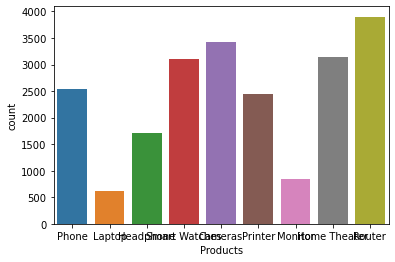

In [10]:
ax= sns.countplot(x='Products',data=data)
print(data['Products'].value_counts())

5    14088
4     5529
3     2121
Name: Ratings, dtype: int64


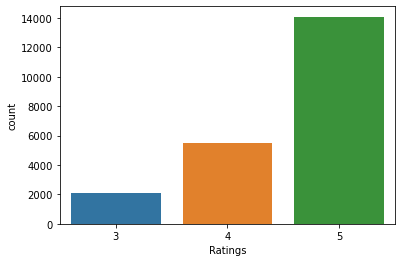

In [11]:
ax= sns.countplot(x='Ratings',data=data)
print(data['Ratings'].value_counts())

                                        Convert Ratings into binary classification

In [13]:
data['Ratings']=data['Ratings'].replace([3,4,5],[0,0,1])

                                             Ordinal Encoding

In [15]:
enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

# Data Analysis

                                        Describe the dataset

In [16]:
data.describe()

,Products,Reviews,Ratings
count,21738.000000,21738.000000,21738.000000
mean,4.268838,39.225688,0.648082
std,2.867429,24.725098,0.477580
min,0.000000,0.000000,0.000000
25%,2.000000,18.000000,0.000000
50%,5.000000,37.000000,1.000000
75%,7.000000,59.000000,1.000000
max,8.000000,84.000000,1.000000


                                                     Correlation

In [17]:
data.corr()

,Products,Reviews,Ratings
Products,1.000000,-0.046295,0.155023
Reviews,-0.046295,1.000000,-0.070145
Ratings,0.155023,-0.070145,1.000000


<AxesSubplot:>

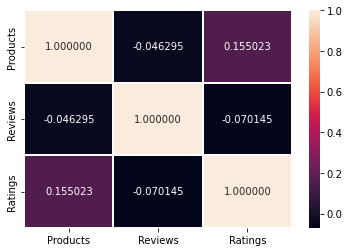

In [19]:
sns.heatmap(data.corr().transpose(),linewidth=2,annot=True,fmt='f')

# Model Testing

In [20]:
x=data.drop(['Ratings'],axis=1)
y=data['Ratings']

                                             Logistic Regression

In [21]:
lr=LogisticRegression()

In [22]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 64.62933753943217
Testing accuracy score: 64.64274762342839


random state 1
Training accuracy score: 65.05651945320714
Testing accuracy score: 63.6461208218338


random state 2
Training accuracy score: 64.70820189274448
Testing accuracy score: 64.458754983134


random state 3
Training accuracy score: 64.65562565720295
Testing accuracy score: 64.58141674333027


random state 4
Training accuracy score: 64.87907465825447
Testing accuracy score: 64.06010426249617


random state 5
Training accuracy score: 64.99079915878023
Testing accuracy score: 63.79944802207912


random state 6
Training accuracy score: 64.68191377497371
Testing accuracy score: 64.52008586323214


random state 7
Training accuracy score: 64.87250262881177
Testing accuracy score: 64.0754369825207


random state 8
Training accuracy score: 64.60304942166141
Testing accuracy score: 64.70407850352653


random state 9
Training accuracy score: 64.47160883280758
Testing accuracy score: 65.0

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=35) 

In [24]:
lr.fit(x_train,y_train)
y_pred1 = lr.predict(x_test)
accuracy = accuracy_score(y_test,y_pred1)*100
print("accuracy score:",accuracy)

accuracy score: 64.61208218337933


In [25]:
cm= confusion_matrix(y_test,y_pred1)
print(cm)

[[  50 2253]
 [  55 4164]]


In [26]:
clr=classification_report(y_test,y_pred1)
print(clr)

              precision    recall  f1-score   support

           0       0.48      0.02      0.04      2303
           1       0.65      0.99      0.78      4219

    accuracy                           0.65      6522
   macro avg       0.56      0.50      0.41      6522
weighted avg       0.59      0.65      0.52      6522



In [27]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred1)

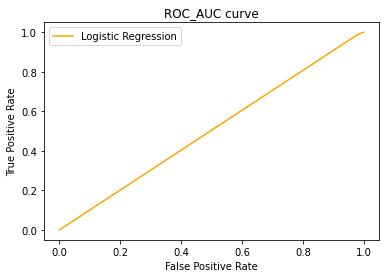

AUC_score 50.4337273733355


In [28]:
plt.plot(fpr,tpr,color='orange',label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred1)*100
print("AUC_score",auc_score)

                                         K Neighbors Classifier

In [29]:
knn= KNeighborsClassifier()

In [30]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    knn.fit(x_train,y_train)
    pred_train=knn.predict(x_train)
    pred_test=knn.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 71.93086225026289
Testing accuracy score: 72.04845139527752


random state 1
Training accuracy score: 71.85856992639327
Testing accuracy score: 70.99049371358478


random state 2
Training accuracy score: 71.06335436382754
Testing accuracy score: 71.06715731370745


random state 3
Training accuracy score: 71.83885383806519
Testing accuracy score: 71.03649187365839


random state 4
Training accuracy score: 72.27260778128286
Testing accuracy score: 71.14382091383011


random state 5
Training accuracy score: 71.20793901156676
Testing accuracy score: 70.57651027292242


random state 6
Training accuracy score: 72.21345951629863
Testing accuracy score: 71.72646427476235


random state 7
Training accuracy score: 70.01840168243953
Testing accuracy score: 69.59521619135235


random state 8
Training accuracy score: 71.7468454258675
Testing accuracy score: 71.18981907390372


random state 9
Training accuracy score: 72.42376445846477
Testing accuracy score: 7

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=44)

In [32]:
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)
accuracy = accuracy_score(y_test,y_pred2)*100
print("accuracy score:",accuracy)

accuracy score: 72.87641827660227


In [33]:
cm= confusion_matrix(y_test,y_pred2)
print(cm)

[[ 886 1419]
 [ 350 3867]]


In [34]:
clr=classification_report(y_test,y_pred2)
print(clr)

              precision    recall  f1-score   support

           0       0.72      0.38      0.50      2305
           1       0.73      0.92      0.81      4217

    accuracy                           0.73      6522
   macro avg       0.72      0.65      0.66      6522
weighted avg       0.73      0.73      0.70      6522



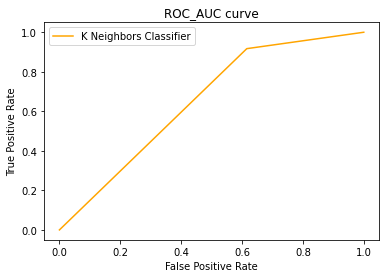

AUC_score 65.06921936156564


In [35]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred2)

plt.plot(fpr,tpr,color='orange',label='K Neighbors Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred2)*100
print("AUC_score",auc_score)

                                          Decision Tree classifier

In [36]:
clf=DecisionTreeClassifier()

In [37]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    clf.fit(x_train,y_train)
    pred_train=clf.predict(x_train)
    pred_test=clf.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 74.66482649842271
Testing accuracy score: 74.19503219871206


random state 1
Training accuracy score: 74.78969505783385
Testing accuracy score: 73.90371051824593


random state 2
Training accuracy score: 74.65168243953732
Testing accuracy score: 74.22569763876112


random state 3
Training accuracy score: 74.55310199789696
Testing accuracy score: 74.05703771849126


random state 4
Training accuracy score: 74.61882229232387
Testing accuracy score: 74.30236123888378


random state 5
Training accuracy score: 74.71740273396425
Testing accuracy score: 74.07237043851579


random state 6
Training accuracy score: 74.63853838065194
Testing accuracy score: 74.25636307881018


random state 7
Training accuracy score: 74.40194532071503
Testing accuracy score: 74.80834099969334


random state 8
Training accuracy score: 74.53995793901157
Testing accuracy score: 74.48635387917817


random state 9
Training accuracy score: 74.17849631966351
Testing accuracy score: 

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=98) 

In [39]:
clf.fit(x_train,y_train)
y_pred3 = clf.predict(x_test)
accuracy = accuracy_score(y_test,y_pred3)*100
print("accuracy score:",accuracy)

accuracy score: 74.5016865992027


In [40]:
cm= confusion_matrix(y_test,y_pred3)
print(cm)

[[ 635 1663]
 [   0 4224]]


In [41]:
clr=classification_report(y_test,y_pred3)
print(clr)

              precision    recall  f1-score   support

           0       1.00      0.28      0.43      2298
           1       0.72      1.00      0.84      4224

    accuracy                           0.75      6522
   macro avg       0.86      0.64      0.63      6522
weighted avg       0.82      0.75      0.69      6522



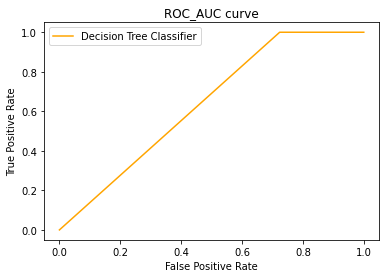

AUC_score 63.81636205395996


In [42]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred3)

plt.plot(fpr,tpr,color='orange',label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred3)*100
print("AUC_score",auc_score)

                                            Random Forest Classifier

In [43]:
rfc=RandomForestClassifier()

In [44]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = i)
    rfc.fit(x_train,y_train)
    pred_train=rfc.predict(x_train)
    pred_test=rfc.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",accuracy_score(y_train,pred_train)*100)
    print("Testing accuracy score:",accuracy_score(y_test,pred_test)*100)
    print('\n')

random state 0
Training accuracy score: 74.66482649842271
Testing accuracy score: 74.19503219871206


random state 1
Training accuracy score: 74.78969505783385
Testing accuracy score: 73.90371051824593


random state 2
Training accuracy score: 74.65168243953732
Testing accuracy score: 74.22569763876112


random state 3
Training accuracy score: 74.54652996845425
Testing accuracy score: 74.47102115915364


random state 4
Training accuracy score: 74.61882229232387
Testing accuracy score: 74.30236123888378


random state 5
Training accuracy score: 74.71740273396425
Testing accuracy score: 74.07237043851579


random state 6
Training accuracy score: 74.63853838065194
Testing accuracy score: 74.25636307881018


random state 7
Training accuracy score: 74.40194532071503
Testing accuracy score: 74.80834099969334


random state 8
Training accuracy score: 74.53995793901157
Testing accuracy score: 74.48635387917817


random state 9
Training accuracy score: 74.17849631966351
Testing accuracy score: 

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=8)

In [46]:
rfc.fit(x_train,y_train)
y_pred4 = rfc.predict(x_test)
accuracy = accuracy_score(y_test,y_pred4)*100
print("accuracy score:",accuracy)

accuracy score: 74.48635387917817


In [47]:
cm= confusion_matrix(y_test,y_pred4)
print(cm)

[[ 630 1664]
 [   0 4228]]


In [48]:
clr=classification_report(y_test,y_pred4)
print(clr)

              precision    recall  f1-score   support

           0       1.00      0.27      0.43      2294
           1       0.72      1.00      0.84      4228

    accuracy                           0.74      6522
   macro avg       0.86      0.64      0.63      6522
weighted avg       0.82      0.74      0.69      6522



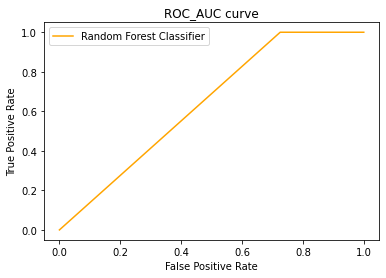

AUC_score 63.73147340889276


In [49]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred4)

plt.plot(fpr,tpr,color='orange',label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,y_pred4)*100
print("AUC_score",auc_score)

                                            Hyper Parameter Tuning
 
Tuning the parameter to increase the accuracy score which predict better score.

# Decision Tree Classifier

In [50]:
clf=DecisionTreeClassifier()

In [55]:
parameters = {'max_features':['auto','sqrt'],
             'max_depth':range(10,35),
             'min_samples_leaf':range(2,5),
             'min_samples_split':range(2,10)}

In [56]:
GCV=GridSearchCV(clf,parameters,cv=5,n_jobs=-1)
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6}

In [57]:
clf = DecisionTreeClassifier(min_samples_split=6,min_samples_leaf=2,max_features='auto',max_depth=10)

clf.fit(x_train,y_train)

pred = clf.predict(x_test)
accuracy_score(y_test,pred)*100

73.91904323827046

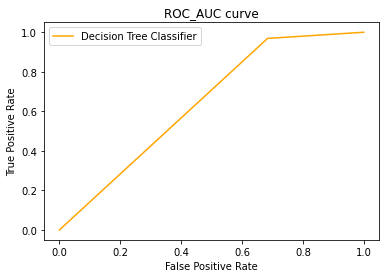

AUC_score 64.24107065529839


In [58]:
fpr,tpr,thresholds = roc_curve(y_test,pred)

plt.plot(fpr,tpr,color='orange',label='Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC curve')
plt.legend()                                                                                 
plt.show()

auc_score = roc_auc_score(y_test,pred)*100
print("AUC_score",auc_score)

                                                 Save File

In [59]:
import joblib

joblib.dump(GCV.best_params_,'Ratings_Prediction_Project.pkl')

['Ratings_Prediction_Project.pkl']

                                                 Conclusion

In [60]:
Prediction=pd.DataFrame({"Actual_value":y_test,"Predicted_value":pred})
Prediction

,Actual_value,Predicted_value
9603,1,1
36,0,0
5444,1,1
7299,0,0
1007,1,1
...,...,...
13293,1,1
2161,0,0
21286,1,1
11677,1,1
